In [33]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
import pickle

seed = 4

In [2]:
data = pd.read_csv('./data/selectedData.csv', index_col='CODIGO_MZ')
data

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,Unidades_Economicas,act_722515,act_722514,act_812110,sum_P_60YMAS_F,sum_P_60YMAS,sum_P_60YMAS_M,sum_POB65_MAS,act_463211,act_722513,sum_P12YM_SEPA,act_465311,act_464113,Paradas_Camion,act_464111
CODIGO_MZ,,,,,,,,,,,,,,,,,
353,5118.0,5118.0,88,0.0,2.0,0.0,40.0,93.0,36.0,42.0,0.0,2.0,105.0,1.0,0.0,9,0.0
352,794.0,794.0,305,1.0,2.0,29.0,678.0,1721.0,583.0,769.0,1.0,1.0,2761.0,17.0,1.0,67,4.0
205,11301.0,11301.0,18,0.0,0.0,0.0,183.0,484.0,132.0,233.0,0.0,0.0,1206.0,1.0,0.0,0,0.0
486,4179.0,4179.0,3,0.0,0.0,0.0,10.0,25.0,9.0,19.0,0.0,0.0,14.0,0.0,0.0,0,0.0
489,781.0,781.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,354,9.0,14.0,18.0,865.0,1515.0,650.0,1108.0,1.0,16.0,1130.0,10.0,0.0,18,1.0
165,16864.0,16864.0,590,9.0,22.0,56.0,704.0,1410.0,677.0,833.0,17.0,14.0,1026.0,20.0,4.0,27,6.0
151,15936.0,15936.0,235,5.0,9.0,12.0,603.0,1079.0,467.0,740.0,3.0,9.0,737.0,11.0,0.0,5,1.0


In [3]:
# Separar Predictores y variables
targets = ['datosAgrupados_Total_destino', 'datosAgrupados_Total_origen']
predictors = [x for x in data.columns if x not in targets]

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=seed)

In [5]:
X_train, X_test = train[predictors], test[predictors]
y_trainOrigen, y_testOrigen = train['datosAgrupados_Total_origen'], test['datosAgrupados_Total_origen']
y_trainDestino, y_testDestino = train['datosAgrupados_Total_destino'], test['datosAgrupados_Total_destino']

In [6]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
origen1 = xgb.XGBRegressor(objective='reg:linear', seed=seed)

#Entrenar modelo
origen1.fit(X_train, y_trainOrigen)

[17:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [7]:
#predecir
y_hatOrigen = origen1.predict(X_test)

#metricas de performance
r2Origen = metrics.r2_score(y_testOrigen, y_hatOrigen)
mseOrigen = metrics.mean_squared_error(y_testOrigen, y_hatOrigen)
maeOrigen = metrics.mean_absolute_error(y_testOrigen, y_hatOrigen)
print('R2:', r2Origen)
print("MSE:", mseOrigen)
print("MAE:", maeOrigen)

R2: 0.3854686465224233
MSE: 74576422.24115805
MAE: 6597.449085235596


In [8]:
origenPred1 = y_testOrigen.to_frame()
origenPred1['y_hat'] = y_hatOrigen
origenPred1['dif'] = origenPred1['datosAgrupados_Total_origen'] - origenPred1['y_hat']
origenPred1

,datosAgrupados_Total_origen,y_hat,dif
CODIGO_MZ,,,
195,18891.0,22695.003906,-3804.003906
348,1308.0,5489.931641,-4181.931641
367,14029.0,9359.228516,4669.771484
140,16376.0,18179.265625,-1803.265625
8,24704.0,35241.929688,-10537.929688
...,...,...,...
103,24280.0,22674.125000,1605.875000
267,21758.0,26397.144531,-4639.144531
485,974.0,3236.260254,-2262.260254


In [9]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
destino1 = xgb.XGBRegressor(objective='reg:linear',
                            seed=seed)

#Entrenar modelo
destino1.fit(X_train, y_trainDestino)

[17:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [10]:
#predecir
y_hatDestino = destino1.predict(X_test)

#metricas de performance
r2Destino = metrics.r2_score(y_testDestino, y_hatDestino)
mseDestino = metrics.mean_squared_error(y_testDestino, y_hatDestino)
maeDestino = metrics.mean_absolute_error(y_testDestino, y_hatDestino)
print('R2:', r2Destino)
print("MSE:", mseDestino)
print("MAE:", maeDestino)

R2: 0.4451223088571119
MSE: 65759899.0217519
MAE: 6365.0776532491045


In [11]:
destinoPred1 = y_testDestino.to_frame()
destinoPred1['y_hat'] = y_hatDestino
destinoPred1['dif'] = destinoPred1['datosAgrupados_Total_destino'] - destinoPred1['y_hat']
destinoPred1

,datosAgrupados_Total_destino,y_hat,dif
CODIGO_MZ,,,
195,18890.0,22922.582031,-4032.582031
348,1308.0,5344.030762,-4036.030762
367,14003.0,11100.109375,2902.890625
140,16376.0,16519.904297,-143.904297
8,25008.0,33025.902344,-8017.902344
...,...,...,...
103,24343.0,21087.345703,3255.654297
267,21499.0,28465.156250,-6966.156250
485,974.0,3909.008789,-2935.008789


# Variables elegidas

In [12]:
data = pd.read_csv('./data/selectedDataV2.csv', index_col='CODIGO_MZ')
data

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,%VPH_AUTOMOVIL
CODIGO_MZ,,,,,,,,,
353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,0.527174
352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,0.633977
205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,0.377477
486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,0.452830
489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,0.513158
165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,0.575826
151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,0.562186


In [13]:
# Separar Predictores y variables
targets = ['datosAgrupados_Total_destino', 'datosAgrupados_Total_origen']
predictors = [x for x in data.columns if x not in targets]

In [14]:
train, test = train_test_split(data, test_size=0.2, random_state=seed)

In [15]:
X_train, X_test = train[predictors], test[predictors]
y_trainOrigen, y_testOrigen = train['datosAgrupados_Total_origen'], test['datosAgrupados_Total_origen']
y_trainDestino, y_testDestino = train['datosAgrupados_Total_destino'], test['datosAgrupados_Total_destino']

In [16]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
origen3 = xgb.XGBRegressor(objective='reg:linear', seed=seed)

#Entrenar modelo
origen3.fit(X_train, y_trainOrigen)

[17:54:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [17]:
#predecir
y_hatOrigen = origen3.predict(X_test)

#metricas de performance
r2Origen = metrics.r2_score(y_testOrigen, y_hatOrigen)
mseOrigen = metrics.mean_squared_error(y_testOrigen, y_hatOrigen)
maeOrigen = metrics.mean_absolute_error(y_testOrigen, y_hatOrigen)
print('R2:', r2Origen)
print("MSE:", mseOrigen)
print("MAE:", maeOrigen)

R2: 0.37833575293341615
MSE: 75442034.19258219
MAE: 6744.424278259277


In [18]:
origenPred3 = y_testOrigen.to_frame()
origenPred3['y_hat'] = y_hatOrigen
origenPred3['dif'] = origenPred3['datosAgrupados_Total_origen'] - origenPred3['y_hat']
origenPred3

,datosAgrupados_Total_origen,y_hat,dif
CODIGO_MZ,,,
195,18891.0,18957.500000,-66.500000
348,1308.0,2285.818604,-977.818604
367,14029.0,12210.651367,1818.348633
140,16376.0,22682.982422,-6306.982422
8,24704.0,35657.175781,-10953.175781
...,...,...,...
103,24280.0,19476.396484,4803.603516
267,21758.0,22307.142578,-549.142578
485,974.0,3148.946533,-2174.946533


In [19]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
destino3 = xgb.XGBRegressor(objective='reg:linear',
                            seed=seed)

#Entrenar modelo
destino3.fit(X_train, y_trainDestino)

[17:54:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [20]:
#predecir
y_hatDestino = destino3.predict(X_test)

#metricas de performance
r2Destino = metrics.r2_score(y_testDestino, y_hatDestino)
mseDestino = metrics.mean_squared_error(y_testDestino, y_hatDestino)
maeDestino = metrics.mean_absolute_error(y_testDestino, y_hatDestino)
print('R2:', r2Destino)
print("MSE:", mseDestino)
print("MAE:", maeDestino)

R2: 0.40366913894651024
MSE: 70672614.58225319
MAE: 6461.680926005046


In [21]:
destinoPred3 = y_testDestino.to_frame()
destinoPred3['y_hat'] = y_hatDestino
destinoPred3['dif'] = destinoPred3['datosAgrupados_Total_destino'] - destinoPred3['y_hat']
destinoPred3

,datosAgrupados_Total_destino,y_hat,dif
CODIGO_MZ,,,
195,18890.0,17525.554688,1364.445312
348,1308.0,3872.148682,-2564.148682
367,14003.0,15734.004883,-1731.004883
140,16376.0,21001.945312,-4625.945312
8,25008.0,32059.632812,-7051.632812
...,...,...,...
103,24343.0,22859.310547,1483.689453
267,21499.0,22181.183594,-682.183594
485,974.0,3085.148193,-2111.148193


In [36]:
with open('./model/origen.pkl', 'wb') as f:  # open a text file
    pickle.dump(origen3, f)

In [37]:
with open('./model/destino.pkl', 'wb') as f:  # open a text file
    pickle.dump(destino3, f)

## Con CODE_MZ

In [22]:
data = pd.read_csv('./data/selectedDataV2_WithDummies.csv', index_col='CODIGO_MZ')
data

,datosAgrupados_Total_destino,datosAgrupados_Total_origen,sum_POBTOT,act_722515,act_722514,act_812110,Unidades_Economicas,Paradas_Camion,%VPH_AUTOMOVIL,1,...,469,470,471,484,485,486,487,488,489,490
CODIGO_MZ,,,,,,,,,,,,,,,,,,,,,
353,5118.0,5118.0,1541.0,0.0,2.0,0.0,88,9,0.527174,0,...,0,0,0,0,0,0,0,0,0,0
352,794.0,794.0,46710.0,1.0,2.0,29.0,305,67,0.633977,0,...,0,0,0,0,0,0,0,0,0,0
205,11301.0,11301.0,17780.0,0.0,0.0,0.0,18,0,0.377477,0,...,0,0,0,0,0,0,0,0,0,0
486,4179.0,4179.0,196.0,0.0,0.0,0.0,3,0,0.452830,0,...,0,0,0,0,0,1,0,0,0,0
489,781.0,781.0,0.0,0.0,0.0,0.0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,21667.0,21435.0,8937.0,9.0,14.0,18.0,354,18,0.513158,0,...,0,0,0,0,0,0,0,0,0,0
165,16864.0,16864.0,10644.0,9.0,22.0,56.0,590,27,0.575826,0,...,0,0,0,0,0,0,0,0,0,0
151,15936.0,15936.0,5937.0,5.0,9.0,12.0,235,5,0.562186,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Separar Predictores y variables
targets = ['datosAgrupados_Total_destino', 'datosAgrupados_Total_origen']
predictors = [x for x in data.columns if x not in targets]

In [24]:
train, test = train_test_split(data, test_size=0.2, random_state=seed)

In [25]:
X_train, X_test = train[predictors], test[predictors]
y_trainOrigen, y_testOrigen = train['datosAgrupados_Total_origen'], test['datosAgrupados_Total_origen']
y_trainDestino, y_testDestino = train['datosAgrupados_Total_destino'], test['datosAgrupados_Total_destino']

In [26]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
origen2 = xgb.XGBRegressor(objective='reg:linear', seed=seed)

#Entrenar modelo
origen2.fit(X_train, y_trainOrigen)

[17:54:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [27]:
#predecir
y_hatOrigen = origen2.predict(X_test)

#metricas de performance
r2Origen = metrics.r2_score(y_testOrigen, y_hatOrigen)
mseOrigen = metrics.mean_squared_error(y_testOrigen, y_hatOrigen)
maeOrigen = metrics.mean_absolute_error(y_testOrigen, y_hatOrigen)
print('R2:', r2Origen)
print("MSE:", mseOrigen)
print("MAE:", maeOrigen)

R2: 0.4459228255414336
MSE: 67240008.31329037
MAE: 6172.798405965169


In [28]:
origenPred2 = y_testOrigen.to_frame()
origenPred2['y_hat'] = y_hatOrigen
origenPred2['dif'] = origenPred2['datosAgrupados_Total_origen'] - origenPred2['y_hat']
origenPred2

,datosAgrupados_Total_origen,y_hat,dif
CODIGO_MZ,,,
195,18891.0,16020.137695,2870.862305
348,1308.0,5021.514160,-3713.514160
367,14029.0,12700.125977,1328.874023
140,16376.0,19495.666016,-3119.666016
8,24704.0,25820.966797,-1116.966797
...,...,...,...
103,24280.0,19294.384766,4985.615234
267,21758.0,21357.414062,400.585938
485,974.0,3307.706299,-2333.706299


In [29]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
destino2 = xgb.XGBRegressor(objective='reg:linear',
                            seed=seed)

#Entrenar modelo
destino2.fit(X_train, y_trainDestino)

[17:54:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [30]:
#predecir
y_hatDestino = destino2.predict(X_test)

#metricas de performance
r2Destino = metrics.r2_score(y_testDestino, y_hatDestino)
mseDestino = metrics.mean_squared_error(y_testDestino, y_hatDestino)
maeDestino = metrics.mean_absolute_error(y_testDestino, y_hatDestino)
print('R2:', r2Destino)
print("MSE:", mseDestino)
print("MAE:", maeDestino)

R2: 0.460460517585376
MSE: 63942130.75814106
MAE: 5986.5102704366045


In [31]:
destinoPred2 = y_testDestino.to_frame()
destinoPred2['y_hat'] = y_hatDestino
destinoPred2['dif'] = destinoPred2['datosAgrupados_Total_destino'] - destinoPred2['y_hat']
destinoPred2

,datosAgrupados_Total_destino,y_hat,dif
CODIGO_MZ,,,
195,18890.0,16073.441406,2816.558594
348,1308.0,4009.072754,-2701.072754
367,14003.0,15585.824219,-1582.824219
140,16376.0,16246.731445,129.268555
8,25008.0,25229.953125,-221.953125
...,...,...,...
103,24343.0,17647.791016,6695.208984
267,21499.0,20974.669922,524.330078
485,974.0,3886.303711,-2912.303711


In [32]:
origenPred1.to_csv('./data/tmp/origenPred1.csv')
origenPred2.to_csv('./data/tmp/origenPred2.csv')
destinoPred1.to_csv('./data/tmp/destinoPred1.csv')
destinoPred2.to_csv('./data/tmp/destinoPred2.csv')

- Sacar tiempos entre zonas con alguna libreria de maps (routingpy)
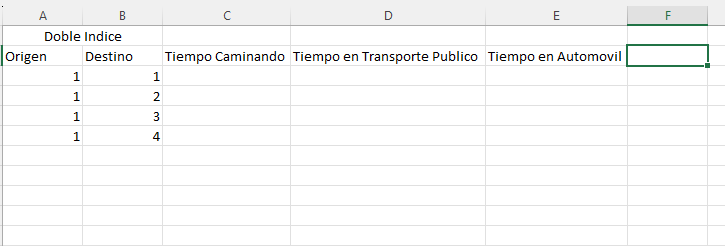